# DOTE5110 IT GROUP10

**Group Members：**

* Haipo Liu 1155218447

* Xinger Lin 1155216531

* Yuying Shi 1155215015

* Qiang Xu 1155220556

* Xuan Li 1155215838

# Data Appendix

**The project data comes from**
https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data

**The dataset document is kaggle.json**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
!pip install -q kaggle
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
#將 Kaggle API 令牌新增至 Colab Notebook
!cp kaggle.json ~/.kaggle/
#複製 JSON 檔案位置
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mysarahmadbhat/lung-cancer

Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
License(s): CC0-1.0
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 3.18MB/s]


In [ ]:
! unzip lung-cancer.zip

Archive:  lung-cancer.zip
  inflating: survey lung cancer.csv  


In [ ]:
df=pd.read_csv("survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Total no. of attributes:16

No .of instances:284



Attribute information:

Gender: M(male), F(female)

Age: Age of the patient

Smoking: YES=2 , NO=1.

Yellow fingers: YES=2 , NO=1.

Anxiety: YES=2 , NO=1.

Peer_pressure: YES=2 , NO=1.

Chronic Disease: YES=2 , NO=1.

Fatigue: YES=2 , NO=1.

Allergy: YES=2 , NO=1.

Wheezing: YES=2 , NO=1.

Alcohol: YES=2 , NO=1.

Coughing: YES=2 , NO=1.

Shortness of Breath: YES=2 , NO=1.

Swallowing Difficulty: YES=2 , NO=1.

Chest pain: YES=2 , NO=1.

Lung Cancer: YES , NO.

# Technical Appendix

## **1 Data Cleaning**

In [ ]:
#show the data structure
rows, columns = df.shape
rows,columns

(309, 16)

In [ ]:
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [ ]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df2 = df.replace({2:'YES',1:'NO'})

In [ ]:
df = df.replace({1:0,2:1})
df['GENDER'] = df['GENDER'].replace({'F':1,'M':0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':1,'NO':0})

<ipython-input-9-44065973204b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'F':1,'M':0})
<ipython-input-9-44065973204b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':1,'NO':0})


In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


## 2 Data Visualization

In [ ]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.485507,62.909420,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.547101,0.550725,0.576087,0.630435,0.467391,0.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,62.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

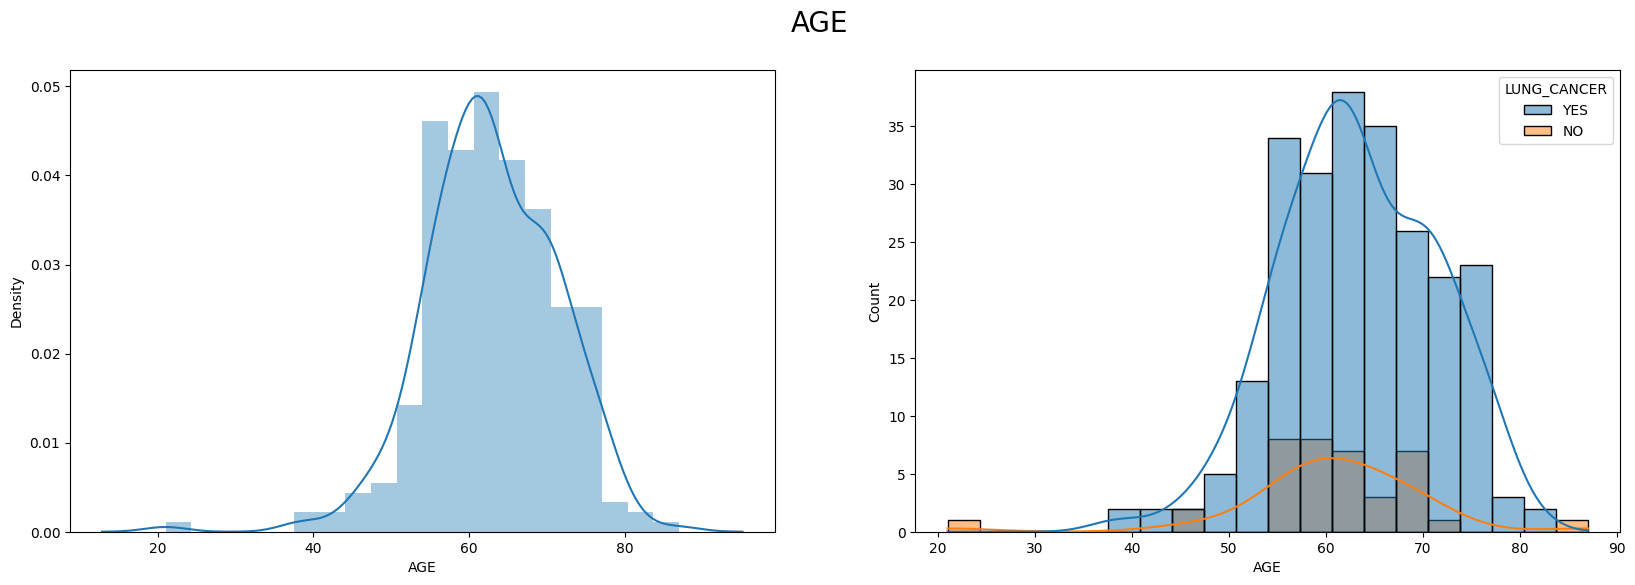

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.clf()
plt.figure()
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(df2['AGE'],ax=ax[0])
sns.histplot(data =df2,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True,color=sns.color_palette("viridis")[1])
plt.suptitle("AGE",size=20)
plt.show()

<Figure size 640x480 with 0 Axes>

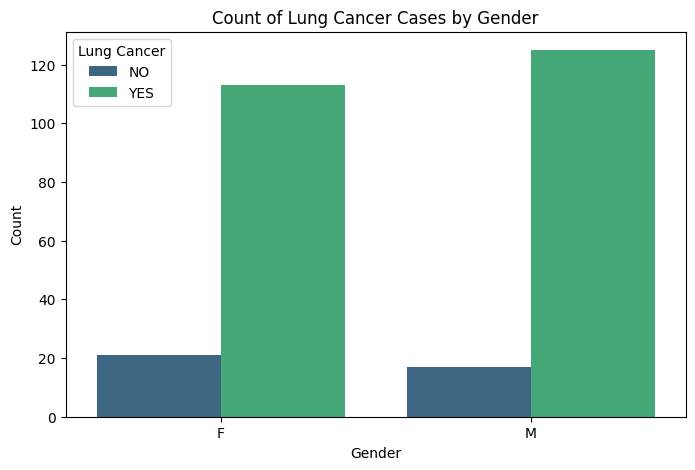

In [ ]:
genders_have_lung_cancer = df2.groupby(['GENDER', 'LUNG_CANCER']).size().reset_index(name='count')

plt.clf()

plt.figure(figsize=(8, 5))
sns.barplot(x='GENDER', y='count', hue='LUNG_CANCER', data=genders_have_lung_cancer, palette='viridis')
plt.title('Count of Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

In [ ]:
df2['AGE_CATEGORY'] = pd.cut(df2['AGE'],bins=[0,13,18,45,60,100],labels=['Children','Teens','Adults','Mid Adults','Elderly'])

In [ ]:
genders_age_smoking_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'SMOKING', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1000x700 with 0 Axes>

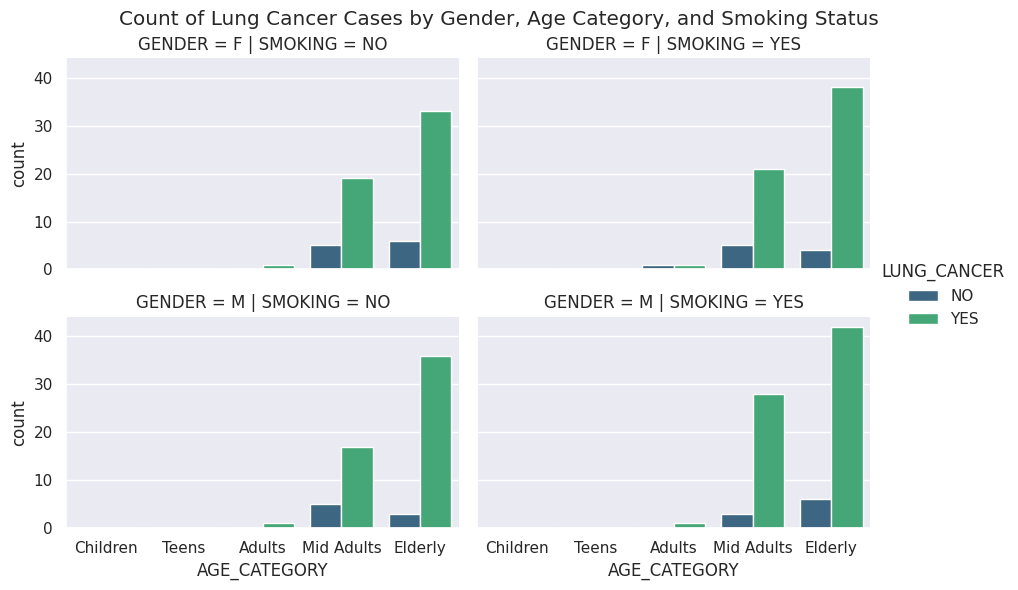

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='SMOKING', row='GENDER',
                data=genders_age_smoking_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Smoking Status')
plt.show()

In [ ]:
genders_age_yellowfingers_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'YELLOW_FINGERS', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1000x700 with 0 Axes>

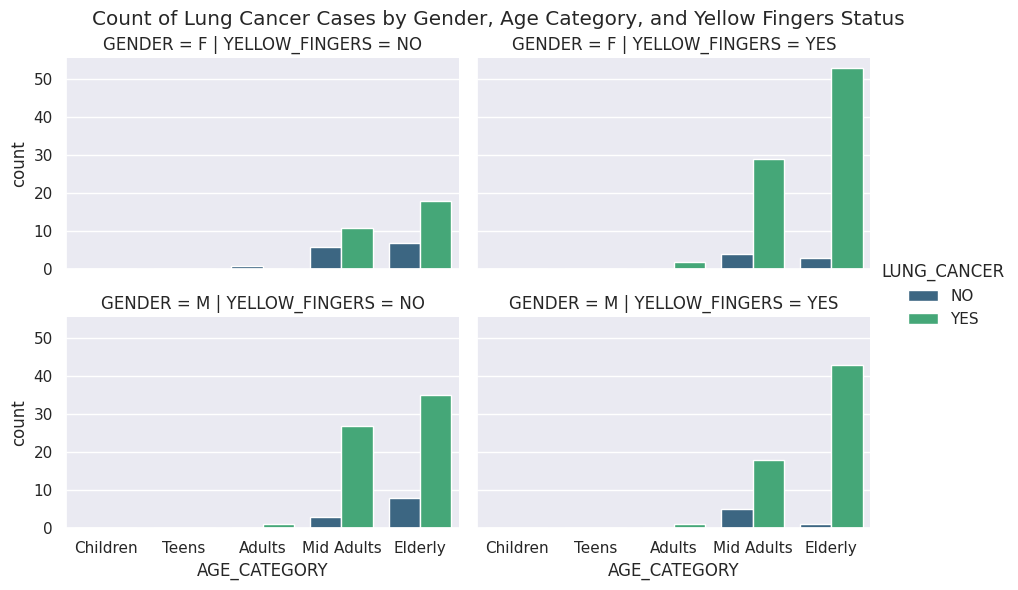

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='YELLOW_FINGERS', row='GENDER',
                data=genders_age_yellowfingers_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Yellow Fingers Status')
plt.show()

In [ ]:
genders_age_anxiety_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'ANXIETY', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

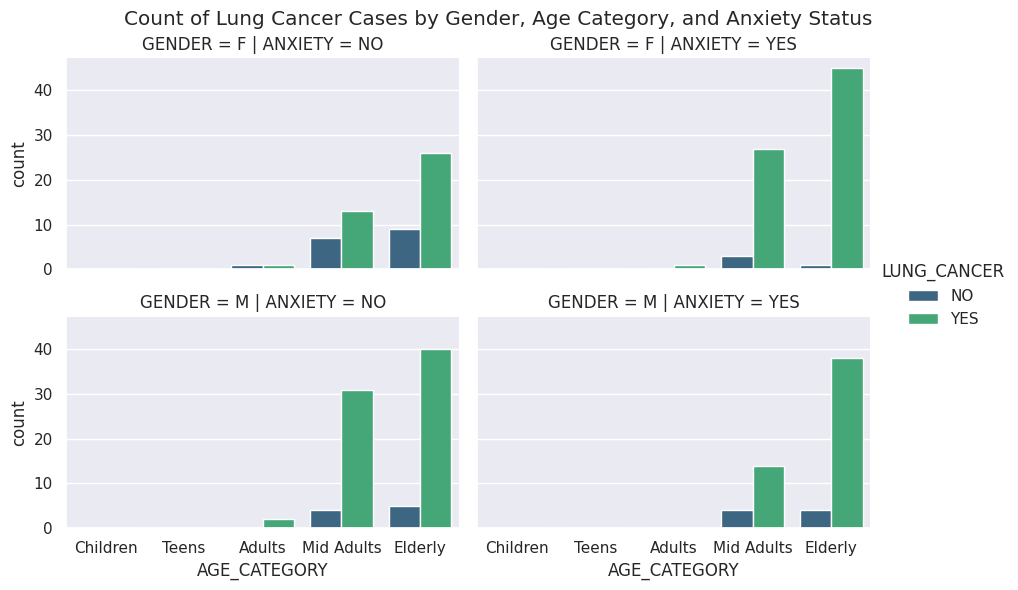

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='ANXIETY', row='GENDER',
                data=genders_age_anxiety_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Anxiety Status')
plt.show()

In [ ]:
genders_age_peerpressure_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'PEER_PRESSURE', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

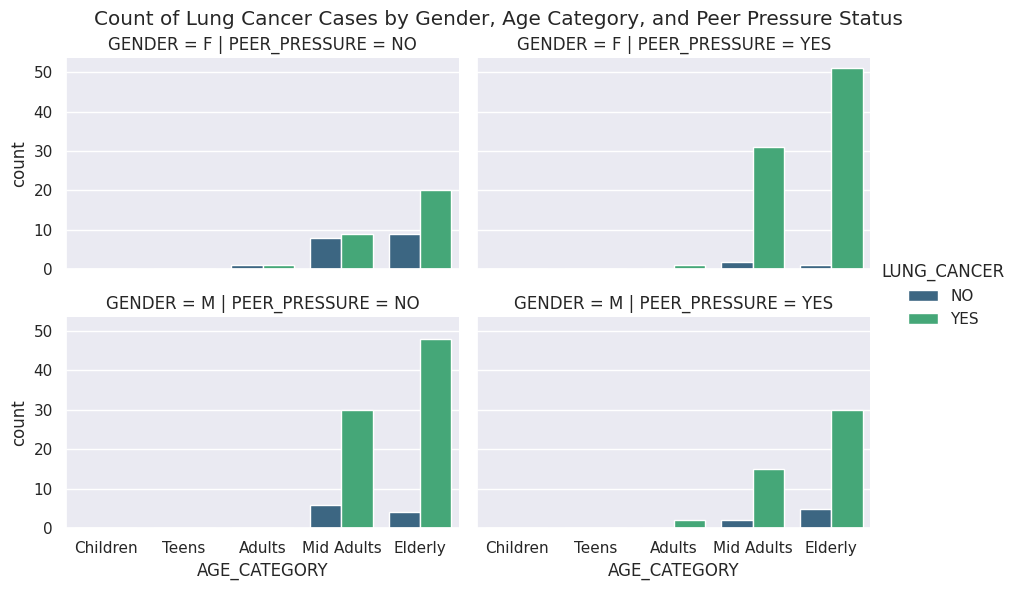

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='PEER_PRESSURE', row='GENDER',
                data=genders_age_peerpressure_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Peer Pressure Status')
plt.show()

In [ ]:
genders_age_chronic_disease_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'CHRONIC_DISEASE', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

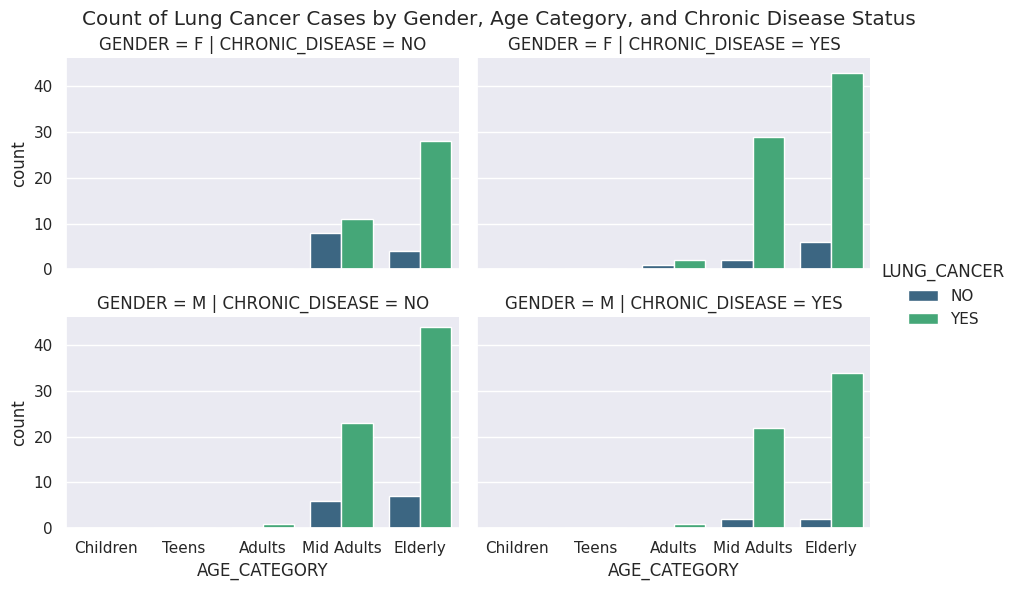

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='CHRONIC_DISEASE', row='GENDER',
                data=genders_age_chronic_disease_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Chronic Disease Status')
plt.show()

In [ ]:
genders_age_fatigue_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'FATIGUE', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

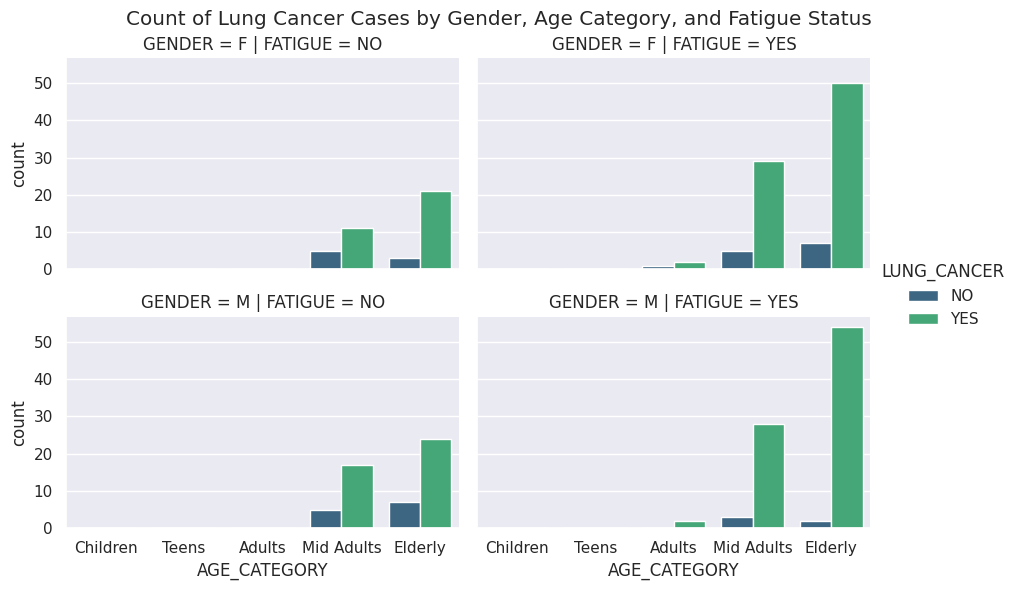

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='FATIGUE', row='GENDER',
                data=genders_age_fatigue_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Fatigue Status')
plt.show()

In [ ]:
genders_age_allergy_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'ALLERGY', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

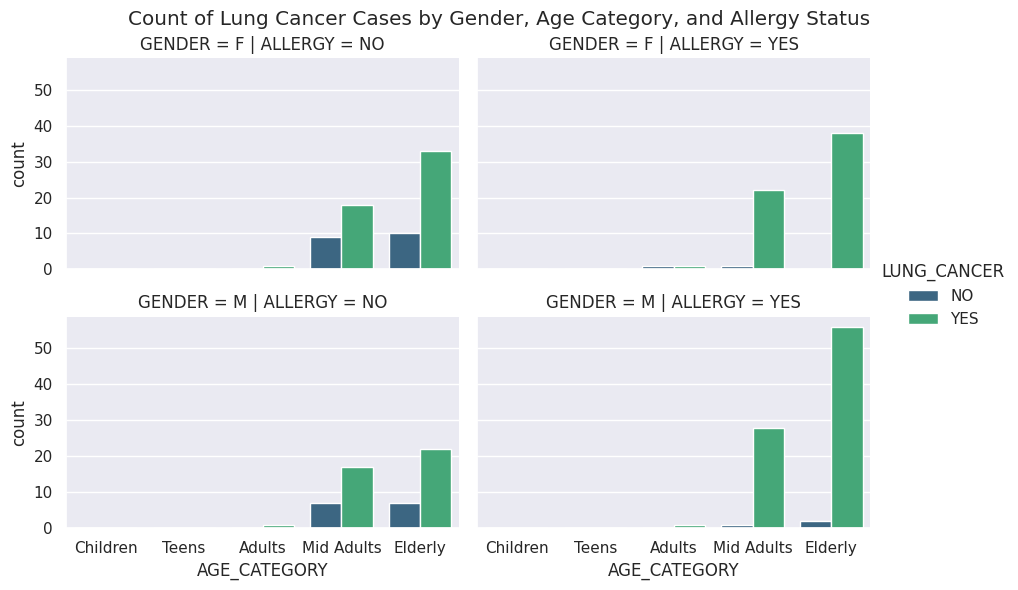

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='ALLERGY', row='GENDER',
                data=genders_age_allergy_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Allergy Status')
plt.show()

In [ ]:
genders_age_wheezing_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'WHEEZING', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

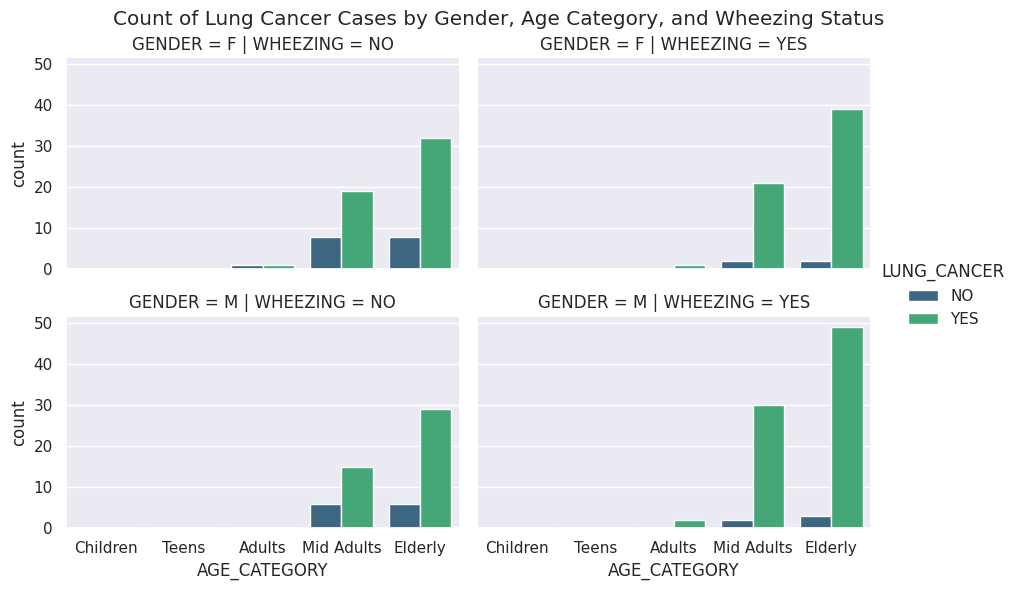

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='WHEEZING', row='GENDER',
                data=genders_age_wheezing_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Wheezing Status')
plt.show()

In [ ]:
genders_age_alcoholconsuming_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'ALCOHOL_CONSUMING', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

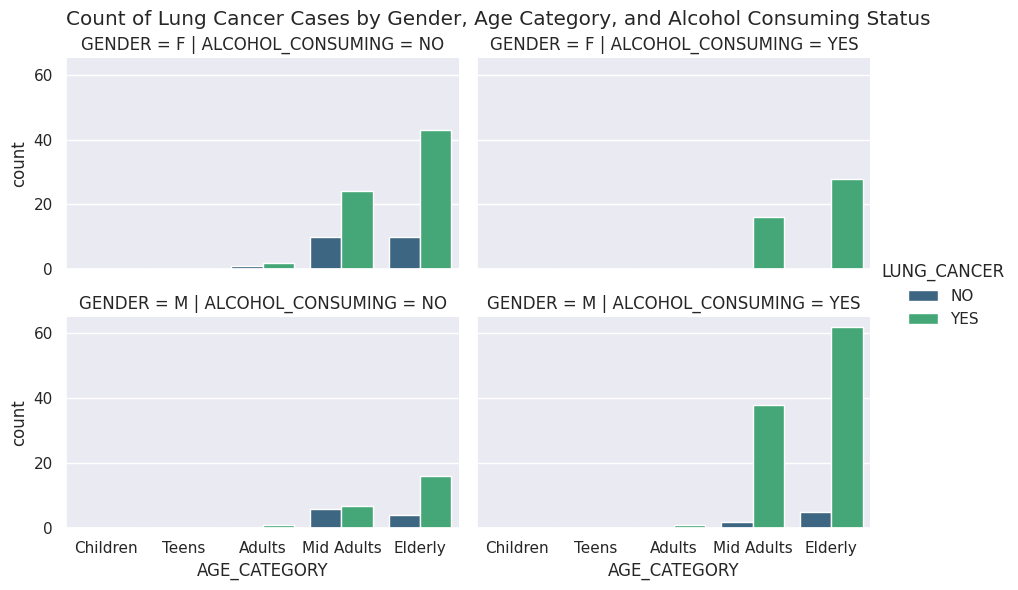

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='ALCOHOL_CONSUMING', row='GENDER',
                data=genders_age_alcoholconsuming_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Alcohol Consuming Status')
plt.show()

In [ ]:
genders_age_coughing_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'COUGHING', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

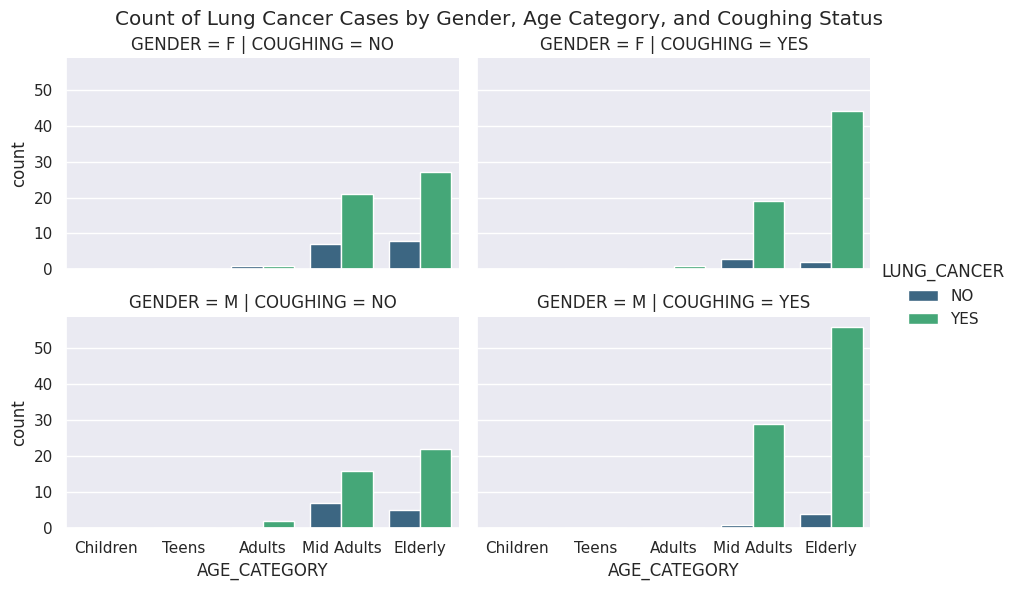

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='COUGHING', row='GENDER',
                data=genders_age_coughing_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Coughing Status')
plt.show()

In [ ]:
genders_age_shortness_of_breath_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'SHORTNESS_OF_BREATH', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

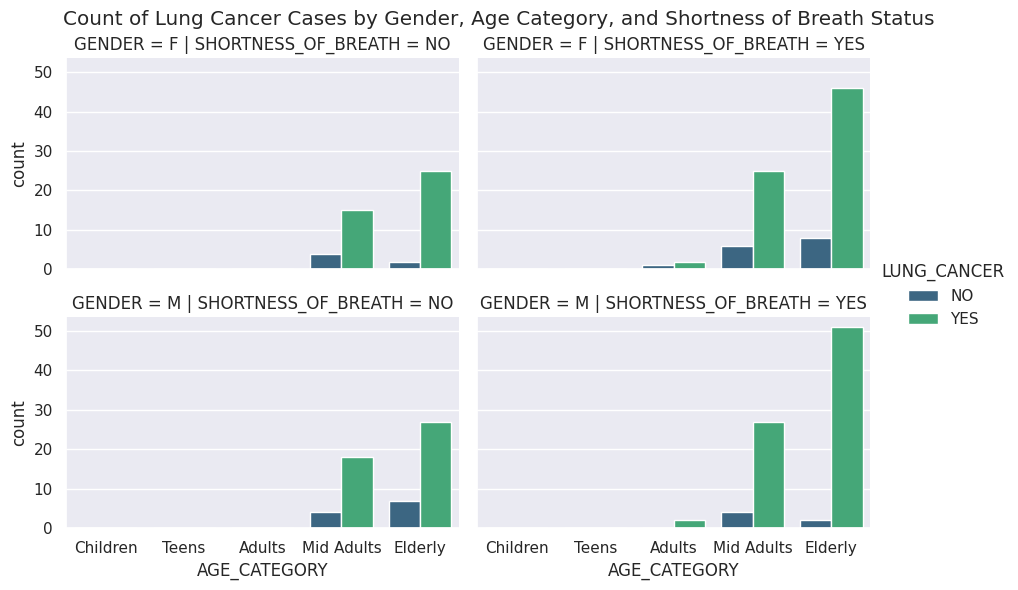

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='SHORTNESS_OF_BREATH', row='GENDER',
                data=genders_age_shortness_of_breath_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Shortness of Breath Status')
plt.show()

In [ ]:
genders_age_swallowing_difficulty_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'SWALLOWING_DIFFICULTY', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

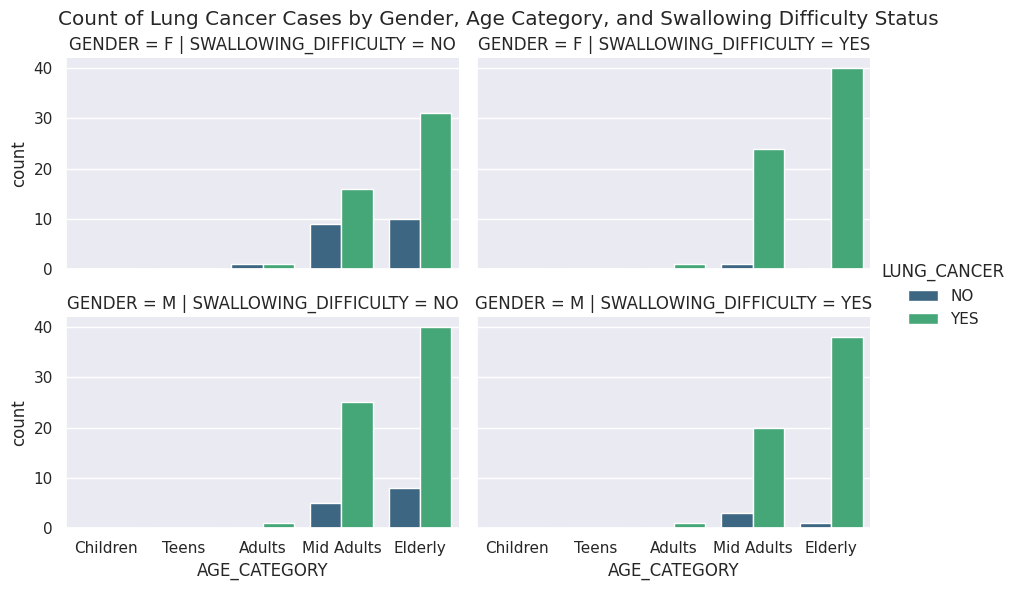

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='SWALLOWING_DIFFICULTY', row='GENDER',
                data=genders_age_swallowing_difficulty_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Swallowing Difficulty Status')
plt.show()

In [ ]:
genders_age_chest_pain_have_lung_cancer = df2.groupby(['GENDER', 'AGE_CATEGORY', 'CHEST_PAIN', 'LUNG_CANCER']).size().reset_index(name='count')

<Figure size 1400x1000 with 0 Axes>

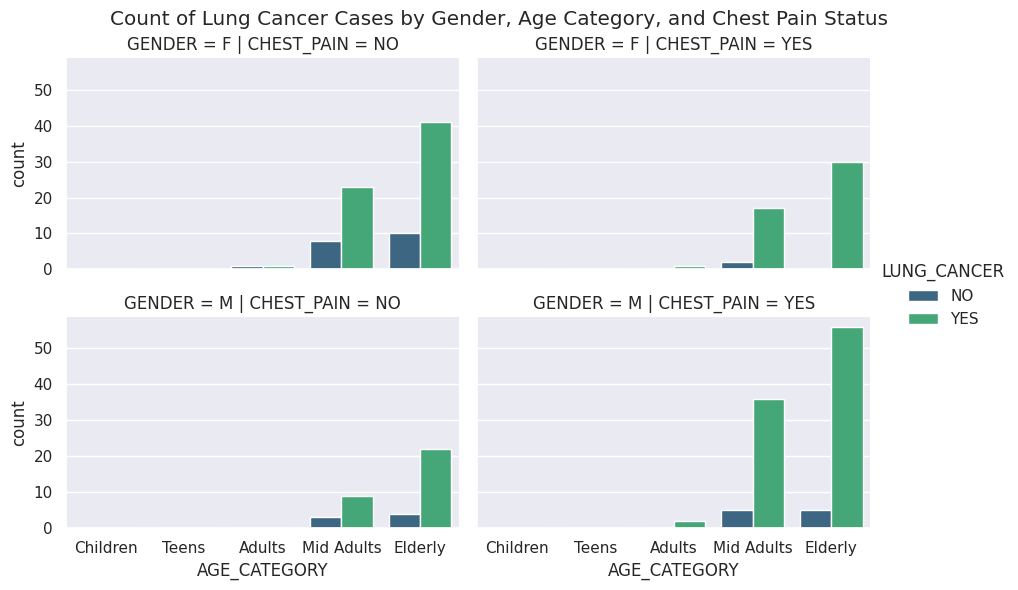

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='CHEST_PAIN', row='GENDER',
                data=genders_age_chest_pain_have_lung_cancer, kind='bar', palette='viridis', height=3, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Chest Pain Status')
plt.show()

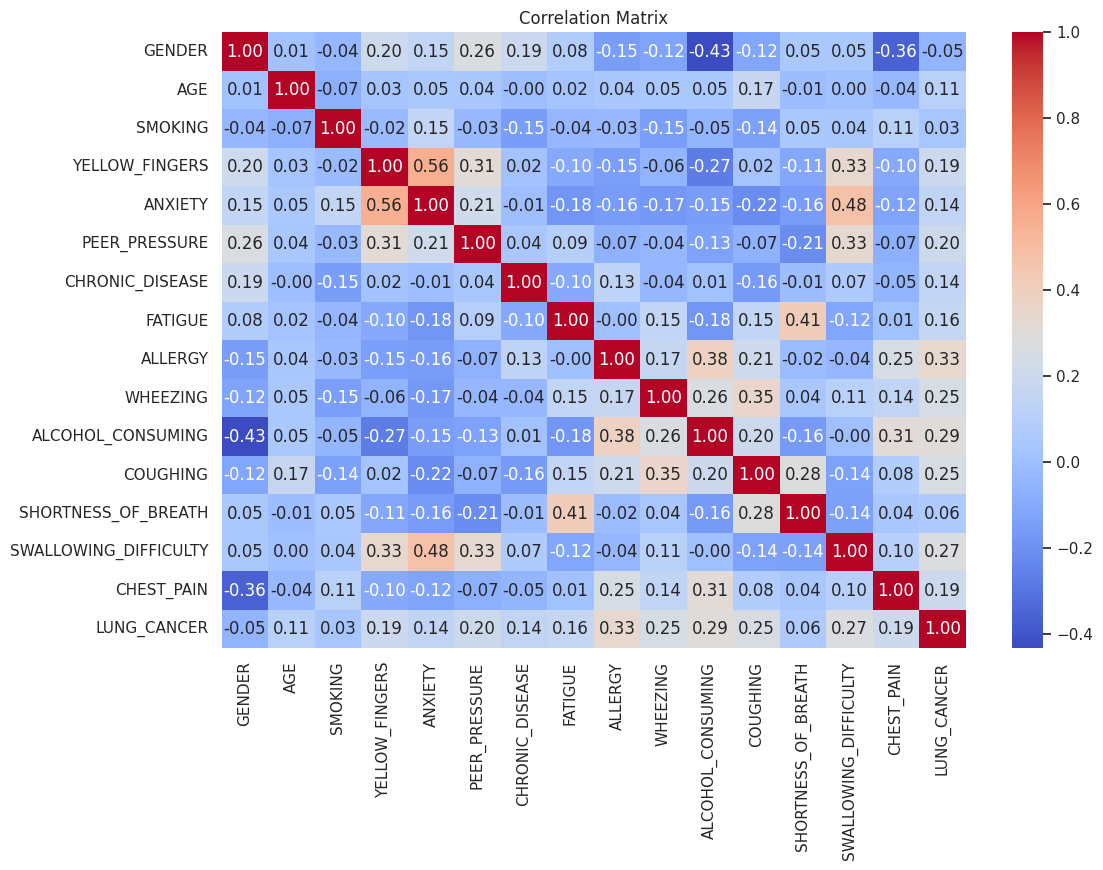

In [ ]:
#Correaltion coefficientmatrix
# select numeric data

correlation_matrix=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 3 Regression

### 3.1 Data Preparation

In [ ]:
# 根据corr挑选相关性最高的几个变量

correlation_matrix=df.corr()
lung_cancer_corr = correlation_matrix['LUNG_CANCER']

# 找到相关性最高的五个变量（排除 LUNG_CANCER 自身）
top_5_corr = lung_cancer_corr.abs().nlargest(6)[1:]

print(top_5_corr)

ALLERGY                  0.333552
ALCOHOL_CONSUMING        0.294422
SWALLOWING_DIFFICULTY    0.268940
COUGHING                 0.253027
WHEEZING                 0.249054
Name: LUNG_CANCER, dtype: float64


In [ ]:
X = df[['ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SWALLOWING_DIFFICULTY']]
y = df['LUNG_CANCER']

In [ ]:
# data StandardScaler & Random Over-sampling

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
xscale = scale.fit_transform(X)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(xscale, y)

In [ ]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### 3.2 Logistic Regression

In [ ]:
# Logit Regression
import statsmodels.api as sm

X_train = sm.add_constant(X_train) # Add constant
logit_model = sm.Logit(y_train, X_train) # Create logit model
logit_results = logit_model.fit() # fit logit model
print(logit_results.summary())
model_result_stat=[]

Optimization terminated successfully.
         Current function value: 0.373891
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  380
Model:                          Logit   Df Residuals:                      374
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                  0.4604
Time:                        09:13:56   Log-Likelihood:                -142.08
converged:                       True   LL-Null:                       -263.31
Covariance Type:            nonrobust   LLR p-value:                 2.271e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4628      0.213      6.877      0.000       1.046       1.880
x1             1.1716      0.

In [ ]:
# 测试集预测y_pred

X_test = sm.add_constant(X_test) # Add constant
y_pred_prob_logit = logit_results.predict(X_test)
y_pred_logit = (y_pred_prob_logit >= 0.5).astype(int)

Logistic Regression Accuracy: 0.81
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        52
           1       0.78      0.82      0.80        44

    accuracy                           0.81        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.81      0.81      0.81        96



<Figure size 640x480 with 0 Axes>

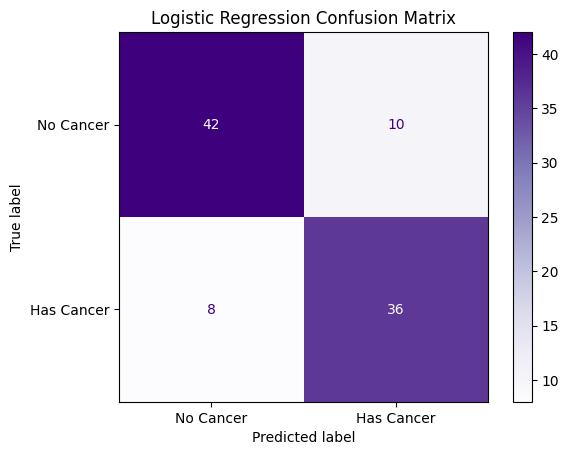

In [ ]:
# performance evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

accuracy_logit = accuracy_score(y_test, y_pred_logit)

# Generate confusion matrix and classification report
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)
class_report_logit = classification_report(y_test, y_pred_logit)

# Display the results
print(f'Logistic Regression Accuracy: {accuracy_logit:.2f}')
print(f'Logistic Regression Classification Report:\n{class_report_logit}')
model_result_stat.append(accuracy_logit)

# Plot confusion matrix
plt.clf()

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logit, display_labels=['No Cancer', 'Has Cancer'])
disp.plot(cmap='Purples')
plt.title(f'Logistic Regression Confusion Matrix')
plt.show()

AUC: 0.8690996503496504


<Figure size 640x480 with 0 Axes>

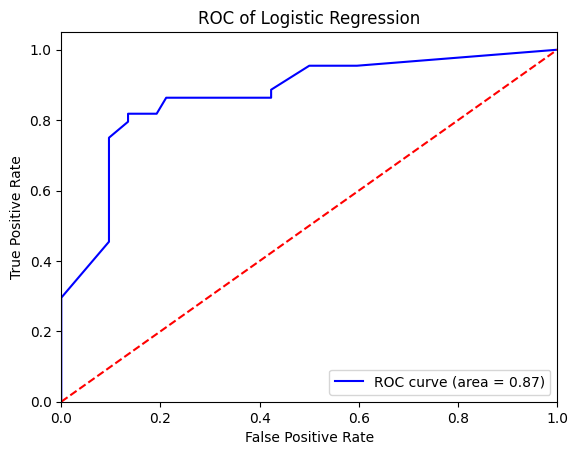

In [ ]:
from sklearn.metrics import roc_curve, auc


# proba
y_scores = y_pred_prob_logit  # 获取正类的概率

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.clf()
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### 3.3 LASSO Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("best lambda:", lasso_cv.alpha_)

best lambda: 0.0005336699231206312


In [ ]:
#LASSO

X_train = np.delete(X_train, 0, axis=1) # delete constant
X_test = np.delete(X_test, 0, axis=1)


lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=5, random_state=42)

In [ ]:
# best lambda to fit LASSO model
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0005336699231206312)

In [ ]:
# predict

y_pred_prob_lasso = lasso.predict(X_test)
y_pred_lasso = (y_pred_prob_lasso >= 0.5).astype(int)

LASSO Regression Accuracy: 0.81
LASSO Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        52
           1       0.78      0.82      0.80        44

    accuracy                           0.81        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.81      0.81      0.81        96



<Figure size 640x480 with 0 Axes>

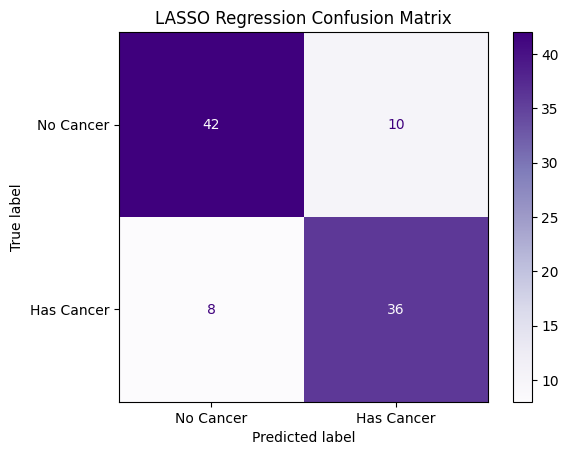

In [ ]:
# performance evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

accuracy_lasso = accuracy_score(y_test, y_pred_lasso)

# Generate confusion matrix and classification report
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
class_report_lasso = classification_report(y_test, y_pred_lasso)
model_result_stat.append(accuracy_lasso)
# Display the results
print(f'LASSO Regression Accuracy: {accuracy_lasso:.2f}')
print(f'LASSO Regression Classification Report:\n{class_report_lasso}')


# Plot confusion matrix

plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lasso, display_labels=['No Cancer', 'Has Cancer'])
disp.plot(cmap='Purples')
plt.title(f'LASSO Regression Confusion Matrix')
plt.show()

AUC: 0.8690996503496503


<Figure size 640x480 with 0 Axes>

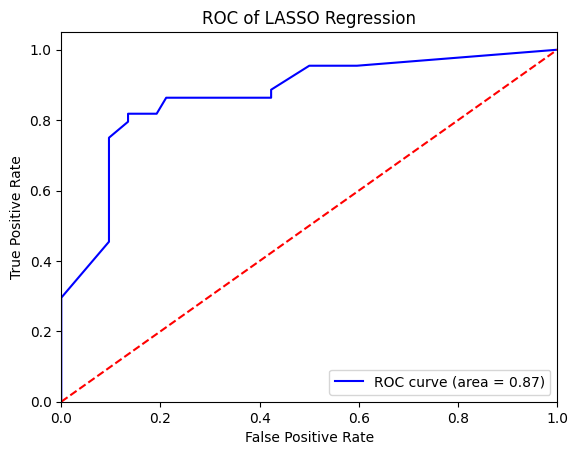

In [ ]:
from sklearn.metrics import roc_curve, auc


# proba
y_scores = y_pred_prob_lasso  # 获取正类的概率

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.clf()
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LASSO Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

In [ ]:
print("LASSO  coef:", lasso.coef_)
print("MSE:", mse)
print("R^2 :", r2)

LASSO  coef: [0.16939373 0.05984559 0.08466814 0.09930279 0.17717932]
MSE: 0.1875
R^2 : 0.2447552447552449


# 4 Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # SVM 分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,precision_recall_curve, average_precision_score

## 4.1 Data Preparation

In [ ]:
# 加载数据集
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4.2 SVM

In [ ]:
# 创建 SVM 分类器
svm_model = SVC(kernel='linear',probability=True)

# 训练模型
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# 进行预测
y_pred_svm = svm_model.predict(X_test)

SVM Accuracy: 0.95
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.94      1.00      0.97        44

    accuracy                           0.95        56
   macro avg       0.97      0.88      0.91        56
weighted avg       0.95      0.95      0.94        56



<Figure size 640x480 with 0 Axes>

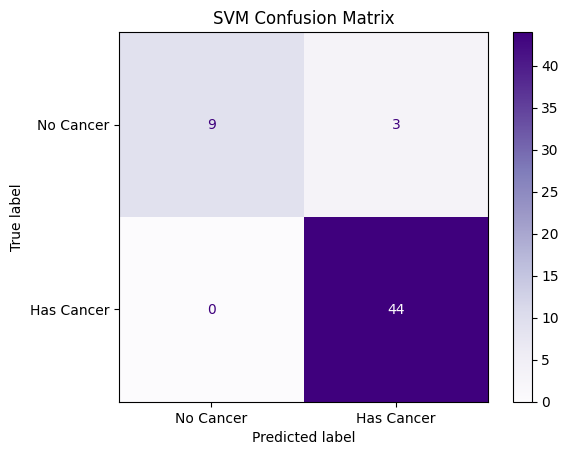

In [ ]:
# performance evaluation

accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Generate confusion matrix and classification report
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
model_result_stat.append(accuracy_svm)
# Display the results
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print(f'SVM Classification Report:\n{class_report_svm}')


# Plot confusion matrix
plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=['No Cancer', 'Has Cancer'])
disp.plot(cmap='Purples')
plt.title(f'SVM Confusion Matrix')
plt.show()

AUC: 0.9810606060606061


<Figure size 640x480 with 0 Axes>

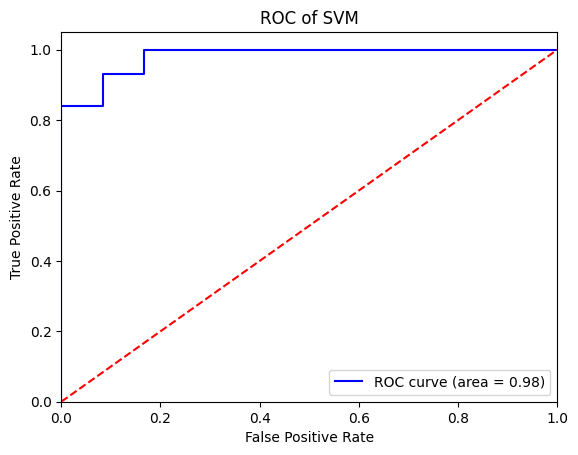

In [ ]:
# proba
y_scores = svm_model.predict_proba(X_test)[:, 1]  # 获取正类的概率

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.clf()
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVM')
plt.legend(loc="lower right")
plt.show()

## 4.3 Random Forest

In [ ]:
# 创建随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 进行预测
y_pred_rf = rf_classifier.predict(X_test)

# 概率预测
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # 获取正类的概率

Random Forest Accuracy: 0.86
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



<Figure size 640x480 with 0 Axes>

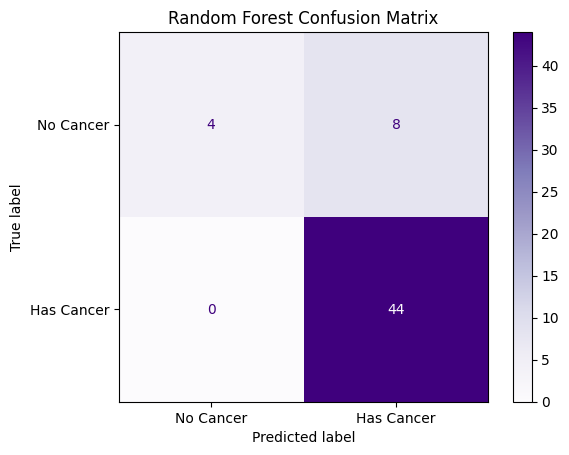

In [ ]:
# performance evaluation

accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate confusion matrix and classification report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
model_result_stat.append(accuracy_rf)
# Display the results
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Classification Report:\n{class_report_rf}')


# Plot confusion matrix
plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['No Cancer', 'Has Cancer'])
disp.plot(cmap='Purples')
plt.title(f'Random Forest Confusion Matrix')
plt.show()

AUC: 0.9772727272727272


<Figure size 640x480 with 0 Axes>

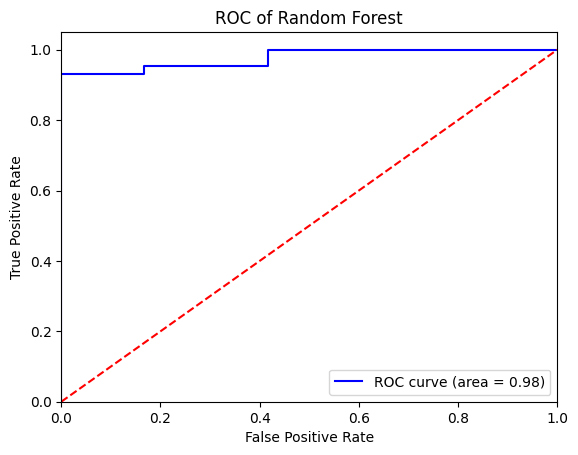

In [ ]:
# proba
y_scores = y_pred_prob_rf # 获取正类的概率

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.clf()
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Random Forest')
plt.legend(loc="lower right")
plt.show()

4.4 Gradient Boosting 梯度增強

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 创建XGBOOOST分类器
gbc_classifer=GradientBoostingClassifier(random_state=42)
# 训练模型
gbc_classifer.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# 进行预测
y_pred_gbc = gbc_classifer.predict(X_test)

# 概率预测
y_pred_prob_gbc = gbc_classifer.predict_proba(X_test)[:, 1]  # 获取正类的概率

GB Accuracy: 0.88
GB Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



<Figure size 640x480 with 0 Axes>

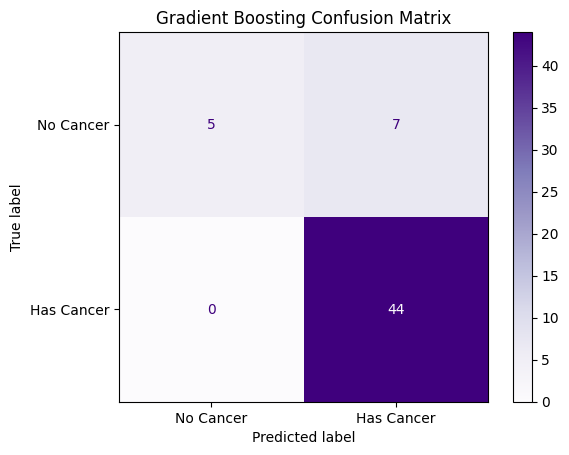

In [ ]:
# performance evaluation

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)

# Generate confusion matrix and classification report
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
class_report_gbc = classification_report(y_test, y_pred_gbc)
model_result_stat.append(accuracy_gbc)
# Display the results
print(f'GB Accuracy: {accuracy_gbc:.2f}')
print(f'GB Classification Report:\n{class_report_gbc}')


# Plot confusion matrix
plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gbc, display_labels=['No Cancer', 'Has Cancer'])
disp.plot(cmap='Purples')
plt.title(f'Gradient Boosting Confusion Matrix')
plt.show()

AUC: 0.9678030303030303


<Figure size 640x480 with 0 Axes>

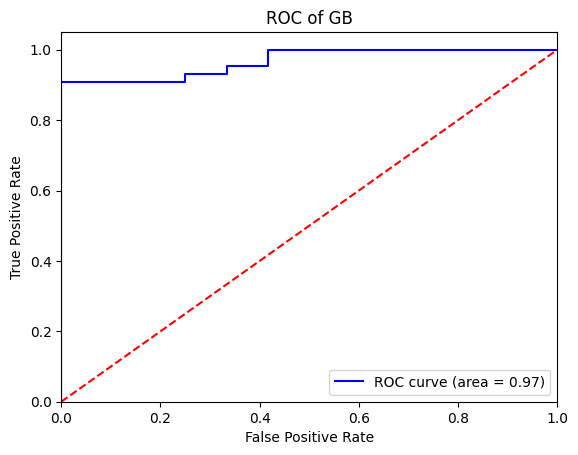

In [ ]:
# proba
y_scores = y_pred_prob_gbc # 获取正类的概率

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.clf()
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of GB')
plt.legend(loc="lower right")
plt.show()

4.5 k-nearest neighbors algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 创建KNN分类器
knn=KNeighborsClassifier(n_neighbors=4)
# 训练模型
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# 进行预测
y_pred_knn = knn.predict(X_test)

# 概率预测
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]  # 获取正类的概率

KNN Accuracy: 0.93
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56



<Figure size 640x480 with 0 Axes>

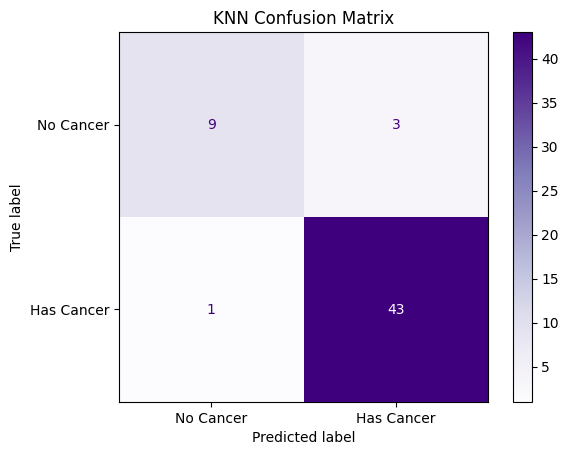

In [ ]:
# performance evaluation

accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Generate confusion matrix and classification report
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
model_result_stat.append(accuracy_knn)
# Display the results
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print(f'KNN Classification Report:\n{class_report_knn}')

# Plot confusion matrix
plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=['No Cancer', 'Has Cancer'])
disp.plot(cmap='Purples')
plt.title(f'KNN Confusion Matrix')
plt.show()

AUC: 0.9772727272727273


<Figure size 640x480 with 0 Axes>

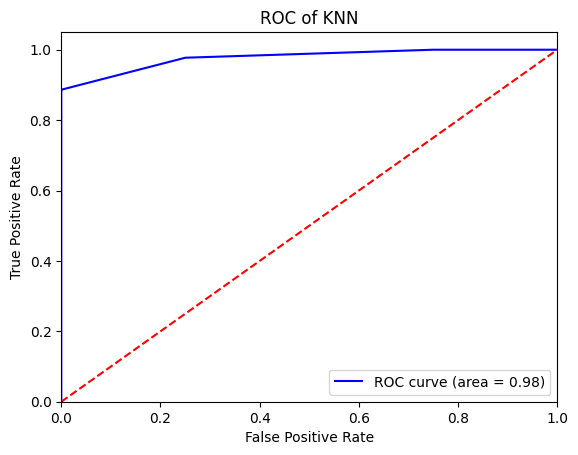

In [ ]:
# proba
y_scores = knn.predict_proba(X_test)[:, 1]  # 获取正类的概率

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.clf()
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(model_result_stat)
ML_list=['logit','LASSO','support vector machine','Random Forest','GradientBoostingClassifier','k-nearest neighbors algorithm']

[0.8125, 0.8125, 0.9464285714285714, 0.8571428571428571, 0.875, 0.9285714285714286]


5.RESULT AND CONCLUSION

In [ ]:
model_result = pd.DataFrame(list(zip(ML_list, model_result_stat)),columns =['ML_method', 'accuracy'])
model_result['accuracy']=model_result['accuracy']*100
model_result=model_result.round({'accuracy':2})
print(model_result)
max_accuracy = 0
best_model_index = 0

for index, row in model_result.iterrows():
    if row['accuracy'] > max_accuracy:
        max_accuracy = row['accuracy']
        best_model_index = index
print('\n')
print(f"The best Machine Learning method is {model_result.iloc[best_model_index]['ML_method']}")
print(f"The best accuracy is {model_result.iloc[best_model_index]['accuracy']}%")

                       ML_method  accuracy
0                          logit     81.25
1                          LASSO     81.25
2         support vector machine     94.64
3                  Random Forest     85.71
4     GradientBoostingClassifier     87.50
5  k-nearest neighbors algorithm     92.86


The best Machine Learning method is support vector machine
The best accuracy is 94.64%
